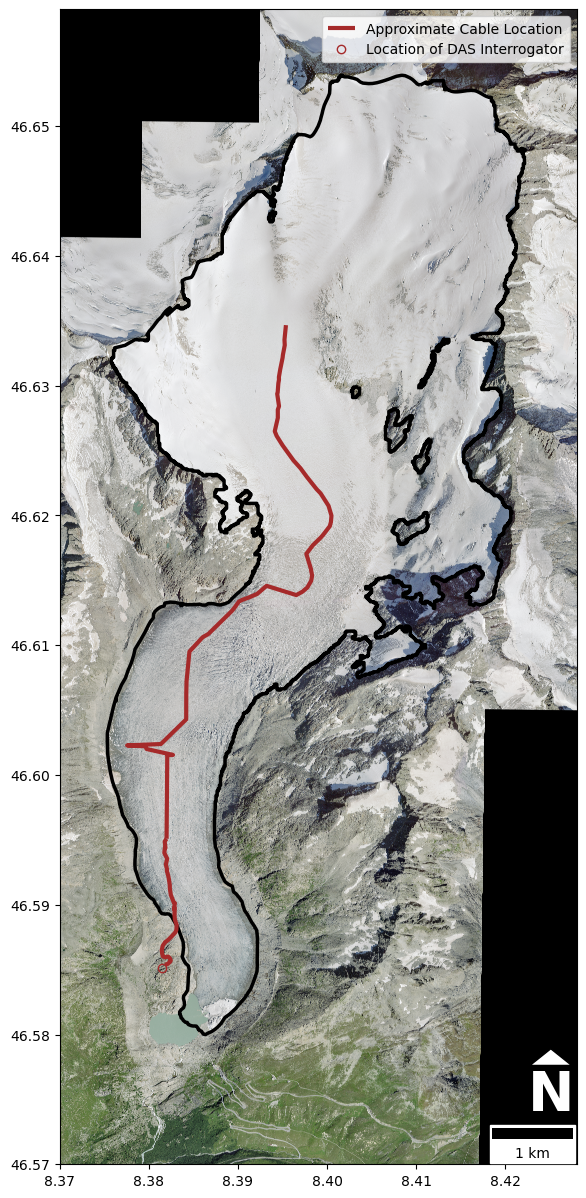

In [9]:
from rasterio.plot import show
from rasterio.merge import merge
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import shapefile as shp
import geopandas
from matplotlib_scalebar.scalebar import ScaleBar

from rasterio.enums import Resampling
import rasterio

#import Rhone outline
rhone_outline = geopandas.read_file("rhone_map_shapefiles/rhone_outline_adapted.shp")
cable_location = geopandas.read_file("rhone_map_shapefiles/cable_location_final.shp")

upscale_factor = 1 #scaling factor for Rhone images


#Import Rhone image
with rasterio.open('Rhone_10cm_images/Rhone_10cm_merged.tif') as dataset:

    # resample data to target shape
    data = dataset.read(
        out_shape=(
            dataset.count,
            int(dataset.height * upscale_factor),
            int(dataset.width * upscale_factor)
        ),
        #resampling=Resampling.bilinear
    )

    # scale image transform
    transform = dataset.transform * dataset.transform.scale(
        (dataset.width / data.shape[-1]),
        (dataset.height / data.shape[-2])
    )



fig, ax = plt.subplots(figsize=(15,15))
fig.patch.set_facecolor('white')

show(data, transform = transform,ax=ax)

ax.set_ylim([46.57, 46.659])
ax.set_xlim([8.37, 8.428])
rhone_outline.plot(ax=ax, facecolor='None', lw = 2.5, label = 'Rhonegletscher')
cable_location.plot(ax=ax, lw = 3, color = 'brown', label = 'Approximate Cable Location')

#DAS location
ax.plot(8.3815,46.58515, label='Location of DAS Interrogator', 
           marker='o', markerfacecolor = 'None', markeredgecolor='brown', linestyle = 'None')

# Create scale bar
import numpy as np
import geopandas as gpd
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import haversine_distances

A=[8.37*np.pi/180.,46.57*np.pi/180.] #Latitude of interest here 46.57 deg, longitude 8.37
B=[9.37*np.pi/180.,46.57*np.pi/180.] ##Latitude of interest here 46.57 deg, longitude 8.37+1
dx=(6371000)*haversine_distances([A,B])[0,1] #6371000 radius in m of Earth

scalebar = ScaleBar(dx, 'm', location = 'lower right')
ax.add_artist(scalebar)

# North arrow
x, y, arrow_length = 0.95, 0.1, 0.04
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length), c= 'white', weight='bold',
            arrowprops=dict(facecolor='white', width=10, headwidth=30),
            ha='center', va='center', fontsize=40,
            xycoords=ax.transAxes)




plt.legend()
#plt.savefig('rhone_map_adapted.pdf')
plt.show()